<a href="https://colab.research.google.com/github/Gurmandeep-Kaur/Data-Generation-using-Modeling-and-Simulation/blob/main/data_generation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cantera

In [2]:
import cantera as ct
print(ct.__version__)

3.2.0


In [3]:
import numpy as np
import pandas as pd

num_samples = 1000

T_init_list = []
P_list = []
phi_list = []
T_final_list = []

gas = ct.Solution("gri30.yaml")

for i in range(num_samples):

    T_init = np.random.uniform(900, 1500)
    P_atm = np.random.uniform(1, 10)
    phi = np.random.uniform(0.5, 1.5)

    P = P_atm * ct.one_atm

    gas.set_equivalence_ratio(phi, fuel="CH4", oxidizer={"O2":1.0, "N2":3.76})
    gas.TP = T_init, P

    reactor = ct.IdealGasConstPressureReactor(gas)
    sim = ct.ReactorNet([reactor])

    sim.advance(1.0)

    T_final = reactor.T

    T_init_list.append(T_init)
    P_list.append(P_atm)
    phi_list.append(phi)
    T_final_list.append(T_final)

df = pd.DataFrame({
    "T_init": T_init_list,
    "Pressure": P_list,
    "Phi": phi_list,
    "T_final": T_final_list
})

print(df.head())

df.to_csv("cantera_simulation_data.csv", index=False)

print("Saved cantera_simulation_data.csv")

/tmp/ipython-input-3524897862.py:24: DeprecationWarning: ReactorBase.__init__: After Cantera 3.2, the default value of the `clone` argument will be `True`, resulting in an independent copy of the `phase` being created for use by this reactor. Add the `clone=False` argument to retain the old behavior of sharing `Solution` objects.
  reactor = ct.IdealGasConstPressureReactor(gas)


        T_init  Pressure       Phi      T_final
0  1104.129840  1.110044  0.726715  2419.200709
1   967.418650  6.951573  0.576437  2149.169240
2   913.258658  9.048462  0.518064  2013.661786
3  1438.795602  4.945985  0.698880  2636.123189
4  1124.643714  7.428723  1.331692  2636.259736
Saved cantera_simulation_data.csv


In [4]:
df.describe()

,T_init,Pressure,Phi,T_final
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1191.990884,5.433081,0.978508,2535.082565
std,170.541441,2.575646,0.285000,341.010987
min,901.496383,1.006551,0.501693,903.877326
25%,1049.787934,3.265712,0.728711,2474.985642
50%,1181.839904,5.332295,0.967411,2617.231847
75%,1345.711387,7.566348,1.224500,2707.025023
max,1499.570148,9.997046,1.499005,2889.593311


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("cantera_simulation_data.csv")

X = df[["T_init", "Pressure", "Phi"]]
y = df["T_final"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2"])
print(results_df)

               Model            MSE        R2
0  Linear Regression   80633.294911  0.412007
1      Random Forest   18684.256690  0.863751
2  Gradient Boosting   21373.050030  0.844144
3                SVR  136872.385346  0.001901
4                KNN   49170.786046  0.641438


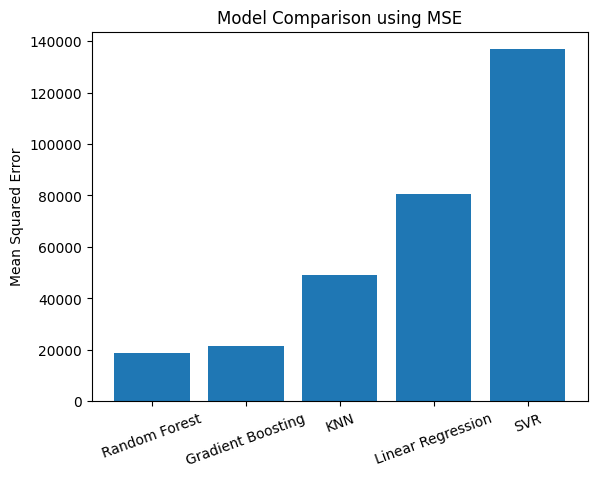

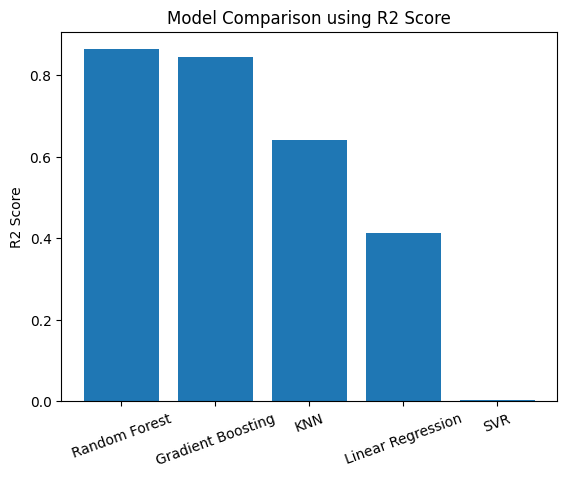

In [6]:
import matplotlib.pyplot as plt

results_sorted = results_df.sort_values("MSE")

plt.figure()
plt.bar(results_sorted["Model"], results_sorted["MSE"])
plt.xticks(rotation=20)
plt.title("Model Comparison using MSE")
plt.ylabel("Mean Squared Error")
plt.show()

results_sorted_r2 = results_df.sort_values("R2", ascending=False)

plt.figure()
plt.bar(results_sorted_r2["Model"], results_sorted_r2["R2"])
plt.xticks(rotation=20)
plt.title("Model Comparison using R2 Score")
plt.ylabel("R2 Score")
plt.show()